# Predicting the Ironman World Championship in Kona

The Ironman is a triathlon consisting of a 2.4 mile swim, 112 mile bike, and 26.2 mile swim.  Pro males tend to have finishing times just over 8 hours, and females tend to complete the course in around 9 hours.  In 2017 Patrick Lange set a course record with a a time of 8:01:40 and Daniela Ryf won with a time of 8:50:47.

This past year, Partick Lange shattered the course record with a time of 7:52:39 (9min 1 sec faster), and Daniela Ryf did the same for the females with a time of 8:26:16 (24min 31 sec faster).

We wanted to look into the data to try to explain this.  Questions we wanted to answer included:
* Was 2018 an anomaly?
* If not, can we predict pro finish times?
* What effects did weather have on performance?
* Does what part of the world have an effect on time?



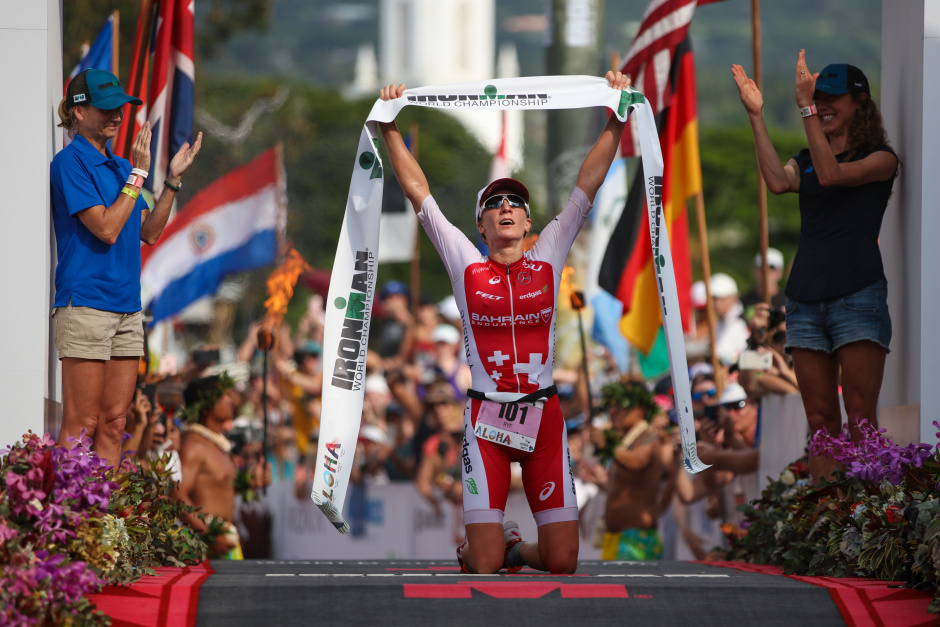

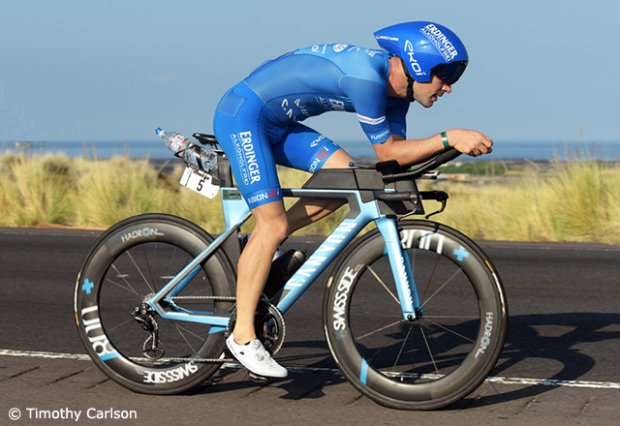

# Gathering Data

As with all projects, we needed data.  Fortunately, Ironman provides all the results for on thier website for us to scrape.  We also gathered all of our weather information from timeanddate.com.

# Scrub Scrub Scrub

The first 2 days of our project were spent on cleaning our data and figuring out what how we wanted to represent our data.

Some issues we ran into:
* Wind direction was given as S, SSW, SW, WSW, and W.  This didn't seem to be exactly categorical because there are relationships between these directions.  We decided to over come this by use sin and cos to break the wind direction and speed into it's X and Y components.
* We had only 11 weather observations.  This seemed low, but after speaking to our classmates we found that we can add these observed weather patterns to each result.
* We first wanted to assess the finish times of all the athletes, but the data becomes skewed and the 17 hour cut off time starts to effect our data.  That when we decided to limit our filed to just the pros who have a more normally distributed set of times.
* We first wanted to try using each athlete's country as a feature, but then decided that continent was a much more meaningful feature to use instead.

### Here are some cool graphs we saw

In [57]:
import pandas as pd 
import numpy as np

In [58]:
mega_data = pd.read_csv('data/mega_data_pro2.csv')

In [59]:
features = mega_data[['Gender', "Avg Temp", 'Hi Temp', "Humidity", 'Wind Speed', 'West', 'South', 'Year', 'Continent', 'extreme_heat']]

In [60]:
target_swim = mega_data.swim
target_bike = mega_data.bike
target_run = mega_data.run
target_finish = mega_data.finish

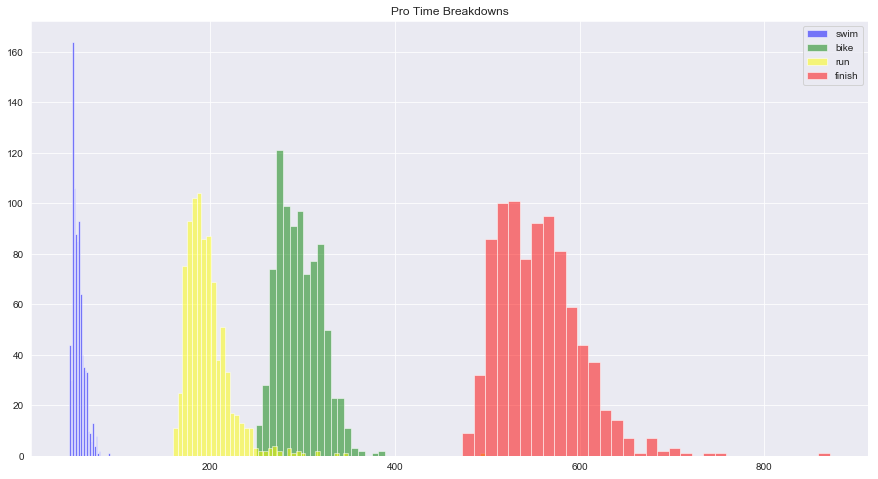

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize= (15,8))
plt.hist(target_swim, bins='auto', alpha = .5, color = 'blue', label='swim')
plt.hist(target_bike, bins='auto', alpha = .5, color = 'green', label='bike')
plt.hist(target_run, bins='auto', alpha = .5, color = 'yellow', label = 'run')
plt.hist(target_finish, bins='auto', alpha = .5, color = 'red', label = 'finish')
plt.title('Pro Time Breakdowns')
plt.legend()
plt.show()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


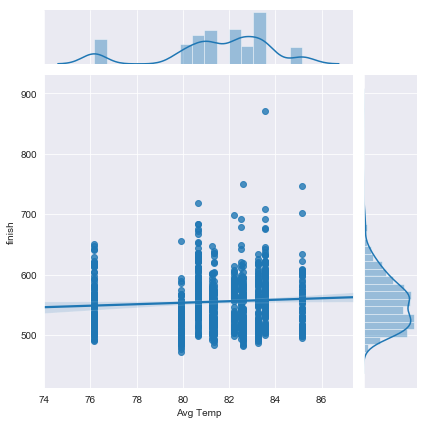

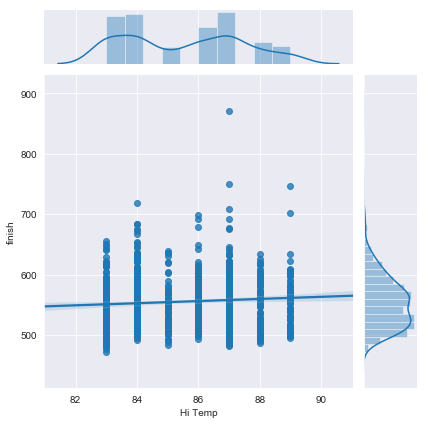

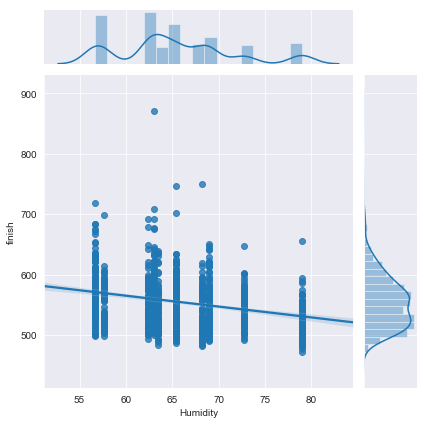

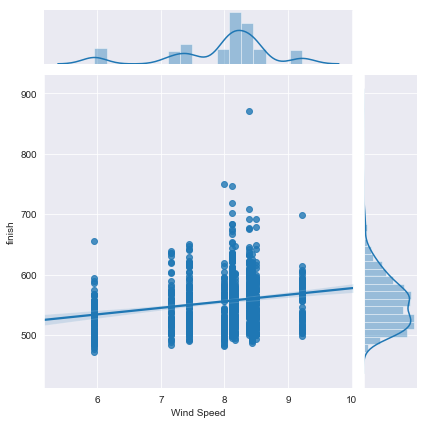

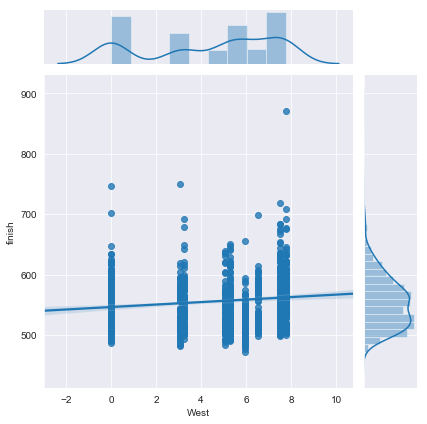

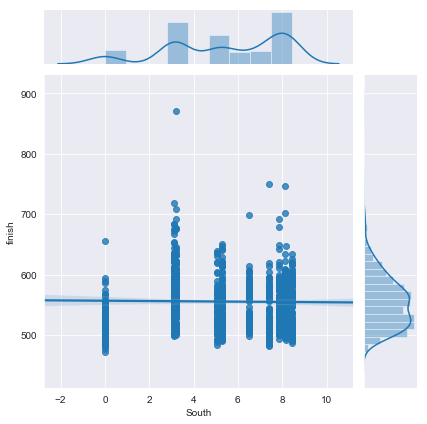

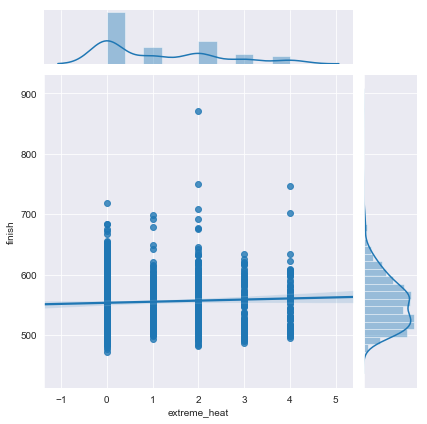

In [62]:
y = mega_data.finish
x = mega_data
columns_xtrain = ['Avg Temp', 'Hi Temp', 'Humidity', 'Wind Speed', 'West', 'South', 'extreme_heat']
for col in columns_xtrain:
   g = sns.jointplot(x[col], y, kind="reg")

# Dealing with Categorical Variables

In [63]:
features['male'] = pd.get_dummies(features['Gender'], drop_first=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
features.drop('Gender', axis=1, inplace=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [65]:
continent_df = pd.get_dummies(mega_data['Continent'])

In [66]:
features = features.merge(continent_df, how = 'left', left_index = True, right_index = True)

In [67]:

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [68]:
features = features.drop(['Continent'], axis=1)

In [69]:
year_df = pd.get_dummies(features['Year'])

In [70]:
#changing column names to type string
year_df.columns = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [71]:
features = features.merge(year_df, how = 'left', left_index = True, right_index = True)

In [72]:
features = features.drop(['Year'], axis = 1)

# Test Train Split

In [73]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [74]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(features, target_finish, random_state=32,test_size=0.2)


In [75]:
#Scaling our data

from sklearn import preprocessing
from sklearn import pipeline

scaler = preprocessing.StandardScaler()

In [76]:
X_train.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,male,A,Af,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
788,81.333,85,63.444,7.167,5.068,5.068,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
381,82.222,86,57.667,9.222,6.521,6.521,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
673,83.238,88,65.429,8.429,0.000,8.429,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
121,83.556,87,63.000,8.389,7.750,3.210,2,1,0,0,...,1,0,0,0,0,0,0,0,0,0
704,83.238,88,65.429,8.429,0.000,8.429,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
#scaling only the non categorical variables
scaler.fit(X_train.iloc[:,:6])
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:6]), columns=X_train.columns[:6], index=X_train.index)



In [78]:
#scaled non categorical variables 
features_scaled_train.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South
788,-0.096154,-0.298148,-0.317674,-1.065374,0.244074,-0.172337
381,0.276164,0.220629,-1.282797,1.655031,0.745229,0.401768
673,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650
121,0.834851,0.739406,-0.391850,0.552307,1.169125,-0.906463
704,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650


In [79]:
#merging the categorical back
features_scaled_train2 = features_scaled_train.merge(X_train.iloc[:, 6:], left_index = True, right_index = True)

In [80]:
features_scaled_train2.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,male,A,Af,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
788,-0.096154,-0.298148,-0.317674,-1.065374,0.244074,-0.172337,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
381,0.276164,0.220629,-1.282797,1.655031,0.745229,0.401768,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
673,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
121,0.834851,0.739406,-0.391850,0.552307,1.169125,-0.906463,2,1,0,0,...,1,0,0,0,0,0,0,0,0,0
704,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Scaling the test set

In [81]:
#scaling the test subset (only the non categorical)
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:6]), columns=X_test.columns[:6], index=X_test.index)

In [82]:
#merge back the categoricals 
features_scaled_test2 = features_scaled_test.merge(X_test.iloc[:, 6:], left_index = True, right_index = True)

In [83]:
features_scaled_test2.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,male,A,Af,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
630,0.439079,0.739406,0.480553,0.037350,-0.448162,0.745519,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
804,-0.690859,-1.335702,2.281157,-2.667170,0.550700,-2.174788,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
530,-2.259705,-1.335702,0.601172,-0.698682,0.311676,-0.094894,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
438,1.509547,1.776960,0.016452,0.184291,-1.503934,1.030003,4,1,0,0,...,0,0,0,0,0,0,1,0,0,0
36,-0.383455,-0.816925,-1.453201,0.193558,1.082897,-0.947160,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


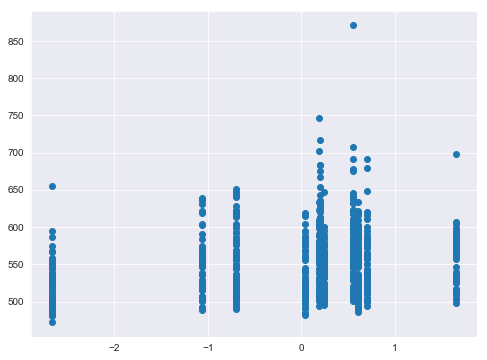

In [84]:
plt.figure(figsize = (8,6))
plt.scatter(features_scaled_train2['Wind Speed'], y_train)

# Feature Engineering 

#### Raising the degrees

In [85]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

#### Add extra features  to training

In [86]:
features_to_train = pd.DataFrame(poly.fit_transform(features_scaled_train2), columns=poly.get_feature_names(features_scaled_train2.columns))
features_to_train.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,male,A,Af,...,2015^2,2015 2016,2015 2017,2015 2018,2016^2,2016 2017,2016 2018,2017^2,2017 2018,2018^2
0,-0.096154,-0.298148,-0.317674,-1.065374,0.244074,-0.172337,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.276164,0.220629,-1.282797,1.655031,0.745229,0.401768,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.834851,0.739406,-0.391850,0.552307,1.169125,-0.906463,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Add extra features to test set

In [87]:
features_many_test = pd.DataFrame(poly.fit_transform(features_scaled_test2), columns=poly.get_feature_names(features_scaled_test2.columns))
features_many_test.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,male,A,Af,...,2015^2,2015 2016,2015 2017,2015 2018,2016^2,2016 2017,2016 2018,2017^2,2017 2018,2018^2
0,0.439079,0.739406,0.480553,0.037350,-0.448162,0.745519,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.690859,-1.335702,2.281157,-2.667170,0.550700,-2.174788,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-2.259705,-1.335702,0.601172,-0.698682,0.311676,-0.094894,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.509547,1.776960,0.016452,0.184291,-1.503934,1.030003,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.383455,-0.816925,-1.453201,0.193558,1.082897,-0.947160,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### We now have 350 features!!

# Feature Selection

In [88]:
from sklearn.feature_selection import VarianceThreshold

In [89]:
thresholder = VarianceThreshold(threshold=.95)
# any variable that falls beneath the threshold will be removed

def variance_threshold_selector(data, threshold=0.95):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [90]:
features_selected_train = variance_threshold_selector(features_to_train)

In [91]:
features_selected_train.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,Avg Temp^2,Avg Temp Hi Temp,Avg Temp extreme_heat,...,Humidity South,Wind Speed^2,Wind Speed South,West extreme_heat,South^2,South extreme_heat,extreme_heat^2,extreme_heat male,extreme_heat Eu,extreme_heat 2015
0,-0.096154,-0.298148,-0.317674,-1.065374,0.244074,-0.172337,0.0,0.009246,0.028668,-0.000000,...,0.054747,1.135022,0.183603,0.000000,0.029700,-0.000000,0.0,0.0,0.0,0.0
1,0.276164,0.220629,-1.282797,1.655031,0.745229,0.401768,1.0,0.076267,0.060930,0.276164,...,-0.515386,2.739128,0.664938,0.745229,0.161417,0.401768,1.0,1.0,1.0,0.0
2,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650,3.0,0.492342,0.882830,2.105012,...,0.016117,0.366339,0.699468,-4.511802,1.335528,3.466951,9.0,3.0,3.0,0.0
3,0.834851,0.739406,-0.391850,0.552307,1.169125,-0.906463,2.0,0.696976,0.617294,1.669702,...,0.355198,0.305043,-0.500646,2.338249,0.821676,-1.812927,4.0,2.0,0.0,0.0
4,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650,3.0,0.492342,0.882830,2.105012,...,0.016117,0.366339,0.699468,-4.511802,1.335528,3.466951,9.0,0.0,3.0,0.0


#### We went from 350 features to 26

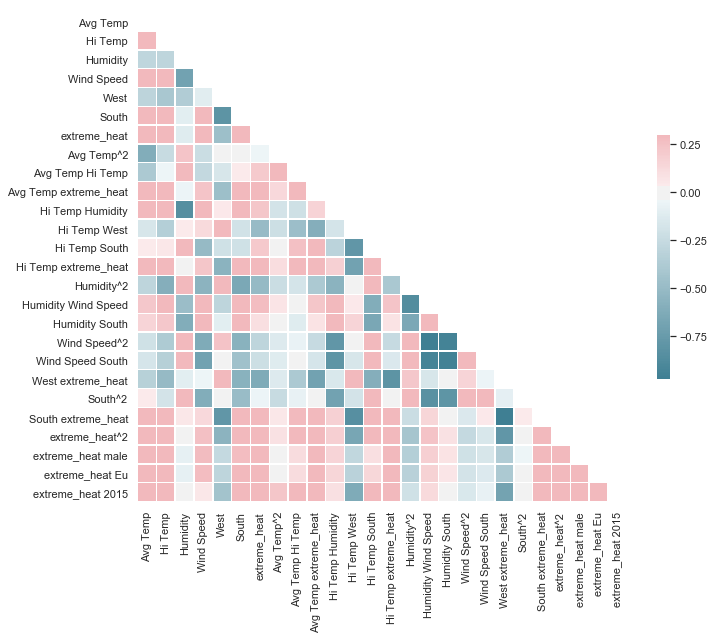

In [92]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [93]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

In [94]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [95]:
# upper

In [96]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > .9)]

In [97]:
to_drop

['extreme_heat',
 'Avg Temp Hi Temp',
 'Hi Temp extreme_heat',
 'Humidity South',
 'Wind Speed^2',
 'Wind Speed South',
 'South^2',
 'South extreme_heat',
 'extreme_heat^2']

In [98]:
features_selected_train.drop(columns=to_drop, inplace=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [99]:
len(features_selected_train.columns)

17

# Feature Selection - K Best Features

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [102]:
features_selected_train = features_to_train

In [103]:
k = 60
def information_selector(X, y, scoring, k=k):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [104]:
test = SelectKBest(score_func=mutual_info_regression, k=k)
fit = test.fit(features_selected_train, y_train)

In [105]:
features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()

,Avg Temp,Humidity,West,South,male,Eu,NoA,2008,2018,Avg Temp Humidity,...,extreme_heat male,male^2,male Au,male Eu,male 2011,male 2018,Eu^2,NoA^2,2008^2,2018^2
0,-0.096154,-0.317674,0.244074,-0.172337,0.0,0.0,1.0,0.0,0.0,0.030546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.276164,-1.282797,0.745229,0.401768,1.0,1.0,0.0,0.0,0.0,-0.354262,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.701671,0.013946,-1.503934,1.155650,1.0,1.0,0.0,0.0,0.0,0.009785,...,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.834851,-0.391850,1.169125,-0.906463,1.0,0.0,0.0,0.0,0.0,-0.327136,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.701671,0.013946,-1.503934,1.155650,0.0,1.0,0.0,0.0,0.0,0.009785,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [106]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=k)

In [107]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train, y_train)

In [112]:
features_selected_test = features_many_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq. Errro:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# z-score
print('Z Score:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std())


Mean Absolute Error: 20.722763649425282
Mean Squared Error: 892.2762840478623
Root Mean Sq. Errro: 29.870994025105063
Z Score: 0.7195372342477439


In [113]:
features_selected_test2 = features_many_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Sq. Errro:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
# z-score
print('Z Score:', np.sqrt(metrics.mean_squared_error(y_train, y_pred))/ y_train.std())


Mean Absolute Error: 23.693712464080452
Mean Squared Error: 1078.9829078306614
Root Mean Sq. Errro: 32.8478752407315
Z Score: 0.7329815315798661


# Finding R^2 and Coefficients

In [110]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [111]:
X2 = features_selected_train
y = y_train
y = list(y_train)
X3 = sm.add_constant(X2)
est1 = sm.OLS(y, X3)
est3 = est1.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     16.73
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           5.02e-68
Time:                        13:40:30   Log-Likelihood:                -3417.5
No. Observations:                 696   AIC:                             6905.
Df Residuals:                     661   BIC:                             7064.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 490.1796    

In [ ]:
coef = pd.DataFrame(data=lm.coef_, columns=features_selected_train.columns )

model_coef = coef.T.sort_values(by=0).T

model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

# Conclusions

We need more data.